In [111]:
# Import libraries
import pandas as pd
import numpy as np

In [112]:
# Load the data
df = pd.read_csv('amazon.csv')

In [113]:
df.describe().T

,count,unique,top,freq
product_id,1465,1351,B07JW9H4J1,3
product_name,1465,1337,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",5
category,1465,211,Computers&Accessories|Accessories&Peripherals|...,233
discounted_price,1465,550,₹199,53
actual_price,1465,449,₹999,120
discount_percentage,1465,92,50%,56
rating,1465,28,4.1,244
rating_count,1463,1143,"9,378",9
about_product,1465,1293,[CHARGE & SYNC FUNCTION]- This cable comes wit...,6
user_id,1465,1194,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...",10


In [114]:
# Drop columns
df = df.drop(['user_name', 'review_id', 'review_title', 'img_link'], axis=1)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  review_content       1465 non-null   object
 11  product_link         1465 non-null   object
dtypes: object(12)
memory usage: 137.5+ KB


### Null data

In [116]:
df.isnull().sum().sort_values(ascending=False)

rating_count           2
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
about_product          0
user_id                0
review_content         0
product_link           0
dtype: int64

In [117]:
df[df['rating_count'].isnull()].head(2)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,review_content,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,80%,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,I have a pd supported car charger and I bought...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,₹249,₹999,75%,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Quick delivery.Awesome ProductPacking was good...,https://www.amazon.in/REDTECH-Lightning-Certif...


In [118]:
# Find rating_count is null and product_id = B0B94JPY2N and replace it with 612
B0B94JPY2N = df[df['rating_count'].isnull() & (df['product_id'] == 'B0B94JPY2N')]
B0B94JPY2N.fillna('612', inplace = True)

/var/folders/xh/z_xrqfjs0l36y0_mzh_wg3r40000gn/T/ipykernel_5066/4267735818.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B0B94JPY2N.fillna('612', inplace = True)


### Weirdo data

In [119]:
df['rating'].value_counts()

rating
4.1    244
4.3    230
4.2    228
4.0    129
3.9    123
4.4    123
3.8     86
4.5     75
4       52
3.7     42
3.6     35
3.5     26
4.6     17
3.3     16
3.4     10
4.7      6
3.1      4
5.0      3
3.0      3
4.8      3
3.2      2
2.8      2
2.3      1
|        1
2        1
3        1
2.6      1
2.9      1
Name: count, dtype: int64

In [120]:
df[df['rating'] == '|'].head(1)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,review_content,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...","₹2,099","₹2,499",16%,|,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Does the job well,doesn't work on sand. though...",https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


In [121]:
# Changing Rating Columns Data Type
df['rating'] = df['rating'].str.replace('|', '3.9').astype('float64')

### Clean signed

In [122]:
df.head(5)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,review_content,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",Looks durable Charging is fine tooNo complains...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",I ordered this cable to connect my phone to An...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Not quite durable and sturdy,https://m.media-a...",https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Good product,long wire,Charges good,Nice,I bou...",https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","Bought this instead of original apple, does th...",https://www.amazon.in/Portronics-Konnect-POR-1...


In [123]:
# Remove ₹ and , from discounted_price 
df['discounted_price'] = df['discounted_price'].str.replace("₹",'')
df['discounted_price'] = df['discounted_price'].str.replace(",",'')
df['discounted_price'] = df['discounted_price'].astype('float64')

In [124]:
df['actual_price'] = df['actual_price'].str.replace("₹",'')
df['actual_price'] = df['actual_price'].str.replace(",",'')
df['actual_price'] = df['actual_price'].astype('float64')

In [125]:
# Changing Datatype and values in Discount Percentage
df['discount_percentage'] = df['discount_percentage'].str.replace('%','').astype('float64')
df['discount_percentage'] = df['discount_percentage'] / 100

In [126]:
# Changing 'rating_count' Column Data Type
df['rating_count'] = df['rating_count'].str.replace(',', '').astype('float64')
# Fill null rating_count with mean
df['rating_count'] = df['rating_count'].fillna(df['rating_count'].mean())

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1465 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  review_content       1465 non-null   object 
 11  product_link         1465 non-null   object 
dtypes: float64(5), object(7)
memory usage: 137.5+ KB


### Data Duplication

In [128]:
# Find Duplicate
df.duplicated().any()

False

In [129]:
any_duplicates = df.duplicated(subset=['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'product_link']).any()

any_duplicates

False

### Add more columns

In [130]:
# Creating the column "rating_weighted"
df['rating_weighted'] = df['rating'] * df['rating_count']

In [131]:
df['sub_category'] = df['category'].astype(str).str.split('|').str[-1]
df['main_category'] = df['category'].astype(str).str.split('|').str[0]

In [132]:
# Concatenate the cleaned tags from all relevant columns
df['tags'] = df[['category', 'about_product']].apply(lambda row: ', '.join(row), axis=1)
df['tags'] = df['tags'].str.lower()
df['tags'] = df['tags'].str.replace('|', ', ')
df['tags'] = df['tags'].str.replace('&', ', ')
df['tags'][0]

"computers, accessories, accessories, peripherals, cables, accessories, cables, usbcables, high compatibility : compatible with iphone 12, 11, x/xsmax/xr ,iphone 8/8 plus,iphone 7/7 plus,iphone 6s/6s plus,iphone 6/6 plus,iphone 5/5s/5c/se,ipad pro,ipad air 1/2,ipad mini 1/2/3,ipod nano7,ipod touch and more apple devices., fast charge, data sync : it can charge and sync simultaneously at a rapid speed, compatible with any charging adaptor, multi-port charging station or power bank., durability : durable nylon braided design with premium aluminum housing and toughened nylon fiber wound tightly around the cord lending it superior durability and adding a bit to its flexibility., high security level : it is designed to fully protect your device from damaging excessive current.copper core thick+multilayer shielding, anti-interference, protective circuit equipment., warranty: 12 months warranty and friendly customer services, ensures the long-time enjoyment of your purchase. if you meet any q

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1465 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  review_content       1465 non-null   object 
 11  product_link         1465 non-null   object 
 12  rating_weighted      1465 non-null   float64
 13  sub_category         1465 non-null   object 
 14  main_category        1465 non-null   object 
 15  tags                 1465 non-null   o

## Data Visualization and Analysis

In [138]:
df['main_category'].value_counts()

main_category
Electronics              526
Computers&Accessories    453
Home&Kitchen             448
OfficeProducts            31
MusicalInstruments         2
HomeImprovement            2
Toys&Games                 1
Car&Motorbike              1
Health&PersonalCare        1
Name: count, dtype: int64

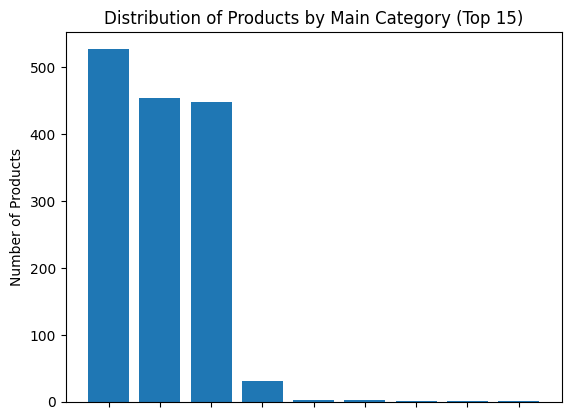

Top 15 main categories:
        Main Category  Number of Products
          Electronics                 526
Computers&Accessories                 453
         Home&Kitchen                 448
       OfficeProducts                  31
   MusicalInstruments                   2
      HomeImprovement                   2
           Toys&Games                   1
        Car&Motorbike                   1
  Health&PersonalCare                   1


In [140]:
import matplotlib.pyplot as plt

# Analyzing distribution of products by main category
main_category_counts = df['main_category'].value_counts()[:15] # Select only the top 15 main categories.
plt.bar(range(len(main_category_counts)), main_category_counts.values)
plt.ylabel('Number of Products')
plt.title('Distribution of Products by Main Category (Top 15)')
plt.xticks(range(len(main_category_counts)), '') # hide X-axis labels
plt.show()

# Top 15 main categories 
top_main_categories = pd.DataFrame({'Main Category': main_category_counts.index, 'Number of Products': main_category_counts.values})
print('Top 15 main categories:')
print(top_main_categories.to_string(index=False))

In [141]:
df['sub_category'].value_counts()

sub_category
USBCables             233
SmartWatches           76
Smartphones            68
SmartTelevisions       63
In-Ear                 52
                     ... 
InternalHardDrives      1
WoodenPencils           1
BatteryChargers         1
DataCards&Dongles       1
HandheldBags            1
Name: count, Length: 207, dtype: int64

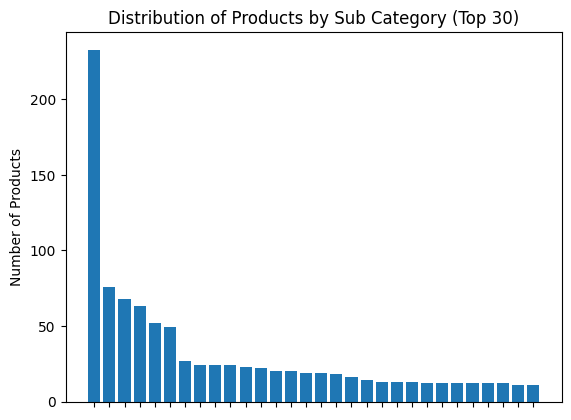

Top 30 sub categories:
            Sub Category  Number of Products
               USBCables                 233
            SmartWatches                  76
             Smartphones                  68
        SmartTelevisions                  63
                  In-Ear                  52
          RemoteControls                  49
           MixerGrinders                  27
              HDMICables                  24
                DryIrons                  24
                    Mice                  24
     InstantWaterHeaters                  23
             LintShavers                  22
              FanHeaters                  20
         ElectricHeaters                  20
         ElectricKettles                  19
            HandBlenders                  19
     WirelessUSBAdapters                  18
            WallChargers                  16
                Lapdesks                  14
          LaundryBaskets                  13
                 MicroSD        

In [145]:
# Analyzing distribution of products by last category
sub_category_counts = df['sub_category'].value_counts()[:30] # Select only the top 30 last categories.
# make a long width plot
# plt.figure(figsize=(10, 6))
plt.bar(range(len(sub_category_counts)), sub_category_counts.values)
plt.ylabel('Number of Products')
plt.title('Distribution of Products by Sub Category (Top 30)')
plt.xticks(range(len(sub_category_counts)), '') # hide X-axis labels
# add number to the bar
# for i, value in enumerate(sub_category_counts.values):
#     plt.text(i, value, str(value), ha = 'center')
plt.show()

# Top 30 sub categories 
top_sub_categories = pd.DataFrame({'Sub Category': sub_category_counts.index, 'Number of Products': sub_category_counts.values})
print('Top 30 sub categories:')
print(top_sub_categories.to_string(index=False))

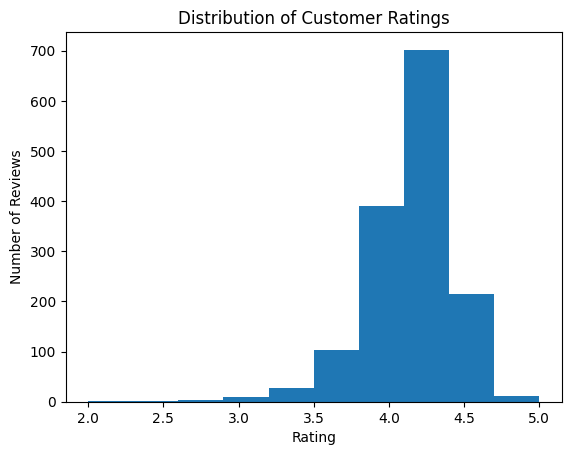

  Cluster  Number of Reviews
4     0-1                  0
3     1-2                  1
2     2-3                  9
1     3-4                526
0     4-5                929


In [146]:
# 3.2 Analyze the distribution of customer ratings using a histogram.
# Plot histogram
plt.hist(df['rating'])
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Customer Ratings')
plt.show()

# Create table with values per cluster
bins = [0, 1, 2, 3, 4, 5] # Define bin edges
df['cluster'] = pd.cut(df['rating'], bins=bins, include_lowest=True, labels=['0-1', '1-2', '2-3', '3-4', '4-5'])
table = df['cluster'].value_counts().reset_index().sort_index(ascending=False).rename(columns={'cluster': 'Cluster', 'count': 'Number of Reviews'})
print(table)

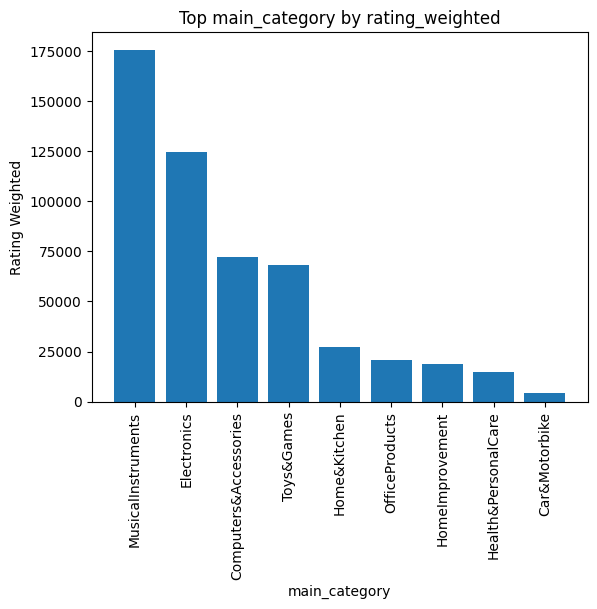

           main_category  rating_weighted
0     MusicalInstruments    175742.200000
1            Electronics    124480.444106
2  Computers&Accessories     72426.638920
3             Toys&Games     68228.100000
4           Home&Kitchen     27321.776116
5         OfficeProducts     20892.509677
6        HomeImprovement     18628.250000
7    Health&PersonalCare     14652.000000
8          Car&Motorbike      4248.400000


In [147]:
# Calculate the top main categories
top = df.groupby(['main_category'])['rating_weighted'].mean().sort_values(ascending=False).head(10).reset_index()

# Create a bar plot
plt.bar(top['main_category'], top['rating_weighted'])

# Add labels and title
plt.xlabel('main_category')
plt.ylabel('Rating Weighted')
plt.title('Top main_category by rating_weighted')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()
ranking = df.groupby('main_category')['rating_weighted'].mean().sort_values(ascending=False).reset_index()
print(ranking)

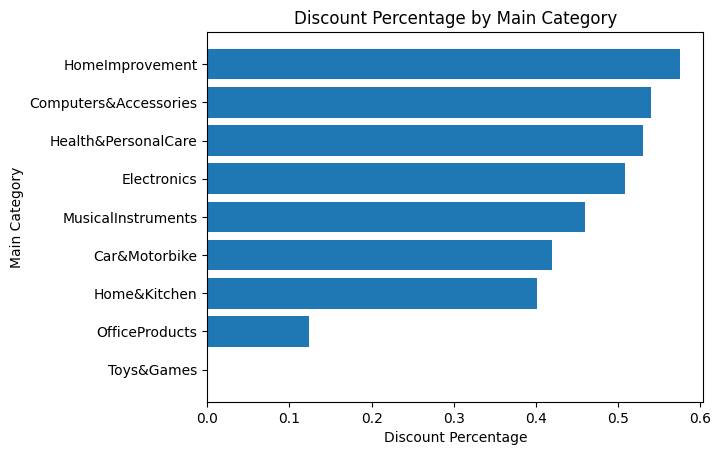

           Main Category  Mean Discount Percentage
0             Toys&Games                  0.000000
1         OfficeProducts                  0.123548
2           Home&Kitchen                  0.401205
3          Car&Motorbike                  0.420000
4     MusicalInstruments                  0.460000
5            Electronics                  0.508289
6    Health&PersonalCare                  0.530000
7  Computers&Accessories                  0.540243
8        HomeImprovement                  0.575000


In [148]:
# sort the means in descending order
mean_discount_by_category = df.groupby('main_category')['discount_percentage'].mean()
mean_discount_by_category = mean_discount_by_category.sort_values(ascending=True)

# create the horizontal bar chart
plt.barh(mean_discount_by_category.index, mean_discount_by_category.values)
plt.title('Discount Percentage by Main Category')
plt.xlabel('Discount Percentage')
plt.ylabel('Main Category')
plt.show()

table = pd.DataFrame({'Main Category': mean_discount_by_category.index, 'Mean Discount Percentage': mean_discount_by_category.values})

print(table)

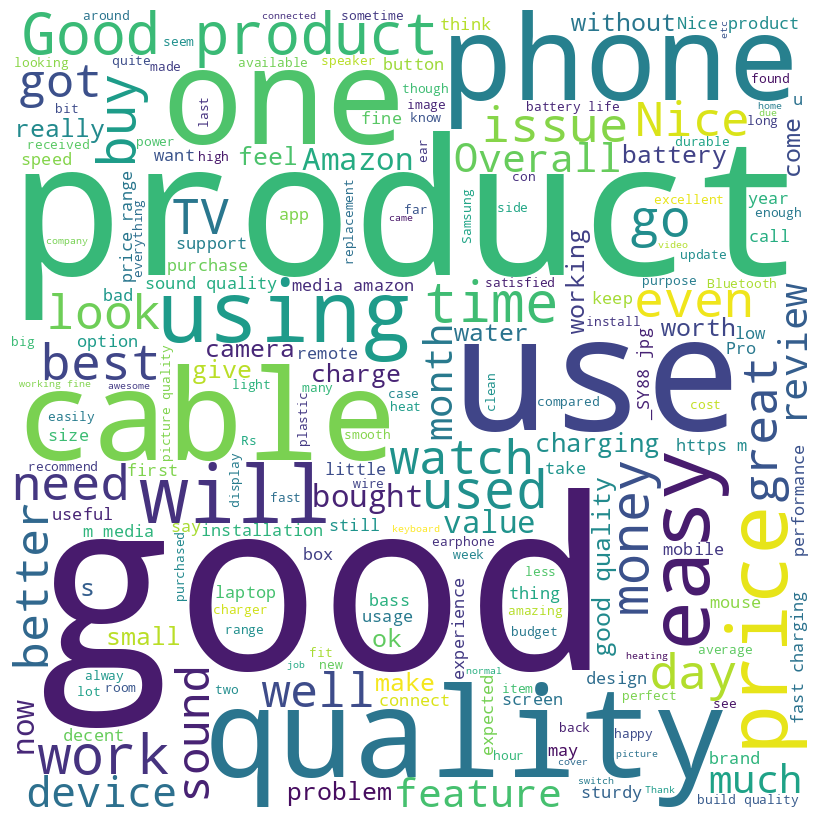

In [150]:
from wordcloud import WordCloud

# 3.3 Analyze the reviews by creating word clouds or frequency tables of the most common words used in the reviews.
reviews_text = ' '.join(df['review_content'].dropna().values)
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(reviews_text)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [151]:
# 3.4 Perform statistical analysis to identify any correlations between different features, such as the relationship between product price and customer rating.
# Drop non-numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_cols.corr()

# Print the correlation matrix
print(correlation_matrix)

                     discounted_price  actual_price  discount_percentage  \
discounted_price             1.000000      0.961915            -0.242412   
actual_price                 0.961915      1.000000            -0.118098   
discount_percentage         -0.242412     -0.118098             1.000000   
rating                       0.120386      0.121744            -0.154563   
rating_count                -0.027258     -0.036133             0.011676   
rating_weighted             -0.026983     -0.035868             0.011032   

                       rating  rating_count  rating_weighted  
discounted_price     0.120386     -0.027258        -0.026983  
actual_price         0.121744     -0.036133        -0.035868  
discount_percentage -0.154563      0.011676         0.011032  
rating               1.000000      0.101568         0.114923  
rating_count         0.101568      1.000000         0.999054  
rating_weighted      0.114923      0.999054         1.000000  


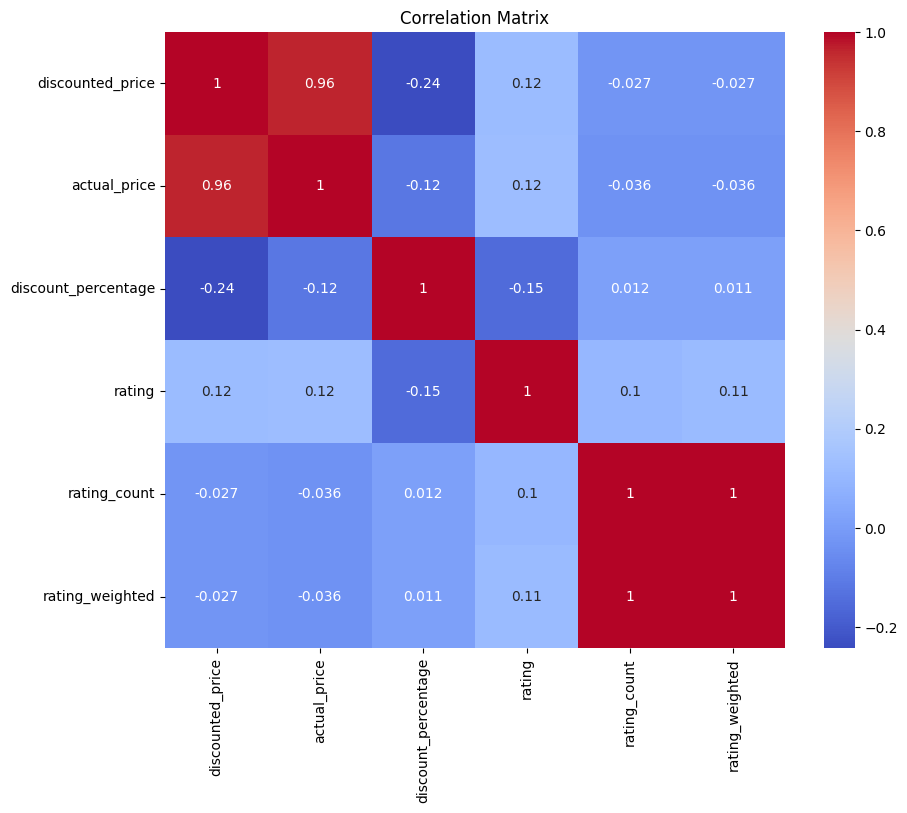

In [152]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Recommendation System

## Pre-processing

In [153]:
from sklearn.preprocessing import LabelEncoder

# Dictionaries to store encoding and decoding maps
encoding_maps = {}
decoding_maps = {}

# Encode categorical variables
label_encoders = {}
for column in ['product_id', 'product_name', 'category', 'about_product', 'user_id', 'sub_category', 'main_category', 'tags']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

    # Create encoding map
    encoding_map = {original: encoded for original, encoded in zip(label_encoders[column].classes_, label_encoders[column].transform(label_encoders[column].classes_))}
    encoding_maps[column] = encoding_map

    # Create decoding map
    decoding_map = {encoded: original for original, encoded in encoding_map.items()}
    decoding_maps[column] = decoding_map

In [154]:
# Print the encoding and decoding maps
print("Encoding Maps:", encoding_maps['product_name'])
print("\nDecoding Maps:", decoding_maps['product_name'])

Encoding Maps: {'!!1000 Watt/2000-Watt Room Heater!! Fan Heater!!Pure White!!HN-2500!!Made in India!!': 0, '!!HANEUL!!1000 Watt/2000-Watt Room Heater!! Fan Heater!!Pure White!!HN-2500!!Made in India!!Thermoset!!': 1, '10WeRun Id-116 Bluetooth Smartwatch Wireless Fitness Band for Boys, Girls, Men, Women & Kids | Sports Gym Watch for All Smart Phones I Heart Rate and spo2 Monitor': 2, '10k 8k 4k HDMI Cable, Certified 48Gbps 1ms Ultra High Speed HDMI 2.1 Cable 4k 120Hz 144Hz 2k 165Hz 8k 60Hz Dynamic HDR ARC eARC DTS:X Compatible for Mac Gaming PC Soundbar TV Monitor Laptop PS5 4 Xbox': 3, '3M Post-it Sticky Note Cube, 200 Sheets (4 Colors x 50 Sheets) | 3" x 3" Size | For notes, reminders, study, school and organizing': 4, '3M Scotch Double Sided Heavy Duty Tape(1m holds 4.5Kgs) for indoor hanging applications (Photo frames, Mirrors, Key Holders, Car Interiors, Extension Boards, Wall decoration, etc)(L: 3m, W: 24mm)': 5, '4 in 1 Handheld Electric Vegetable Cutter Set,Wireless Food Process

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   product_id           1465 non-null   int64   
 1   product_name         1465 non-null   int64   
 2   category             1465 non-null   int64   
 3   discounted_price     1465 non-null   float64 
 4   actual_price         1465 non-null   float64 
 5   discount_percentage  1465 non-null   float64 
 6   rating               1465 non-null   float64 
 7   rating_count         1465 non-null   float64 
 8   about_product        1465 non-null   int64   
 9   user_id              1465 non-null   int64   
 10  review_content       1465 non-null   object  
 11  product_link         1465 non-null   object  
 12  rating_weighted      1465 non-null   float64 
 13  sub_category         1465 non-null   int64   
 14  main_category        1465 non-null   int64   
 15  tags                 

## Rating Base System

In [170]:
average_rating = df.groupby(['product_name', 'main_category', 'sub_category', 'rating_count'])['rating'].mean().reset_index()
top_rated_items2 = average_rating.sort_values(by = ['rating', 'rating_count'], ascending = False)
# decode the product_name, main_category, and sub_category columns
top_rated_items2['product_name'] = top_rated_items2['product_name'].map(decoding_maps['product_name'])
top_rated_items2['main_category'] = top_rated_items2['main_category'].map(decoding_maps['main_category'])
top_rated_items2['sub_category'] = top_rated_items2['sub_category'].map(decoding_maps['sub_category'])
# select the top 15 items
top_rated_items2.head(10)

,product_name,main_category,sub_category,rating_count,rating
894,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories,USBCables,18295.541353,5.0
86,Amazon Basics Wireless Mouse | 2.4 GHz Connect...,Computers&Accessories,Mice,23.000000,5.0
1073,Syncwire LTG to USB Cable for Fast Charging Co...,Computers&Accessories,USBCables,5.000000,5.0
1071,Swiffer Instant Electric Water Heater Faucet T...,Home&Kitchen,InstantWaterHeaters,53803.000000,4.8
521,"Instant Pot Air Fryer, Vortex 2QT, Touch Contr...",Home&Kitchen,AirFryers,3964.000000,4.8
764,"Oratech Coffee Frother electric, milk frother ...",Home&Kitchen,HandBlenders,28.000000,4.8
1052,Spigen EZ Fit Tempered Glass Screen Protector ...,Electronics,ScreenProtectors,7779.000000,4.7
1040,Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...,Electronics,SmartTelevisions,5935.000000,4.7
246,Campfire Spring Chef Prolix Instant Portable W...,Home&Kitchen,InstantWaterHeaters,2591.000000,4.7
705,Multifunctional 2 in 1 Electric Egg Boiling St...,Home&Kitchen,EggBoilers,2300.000000,4.7


### Content Base System

In [159]:
# Content Base Recommendation system (User Preferences or Items similarities)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tags = df['tags'].map(decoding_maps['tags'])
tfidf_matrix_content = tfidf_vectorizer.fit_transform(tags)
consine_sim_content = cosine_similarity(tfidf_matrix_content, tfidf_matrix_content)

consine_sim_content

array([[1.        , 0.1026719 , 0.20312501, ..., 0.02831326, 0.03023311,
        0.00254099],
       [0.1026719 , 1.        , 0.12464897, ..., 0.        , 0.01511577,
        0.01733193],
       [0.20312501, 0.12464897, 1.        , ..., 0.01714664, 0.02538347,
        0.        ],
       ...,
       [0.02831326, 0.        , 0.01714664, ..., 1.        , 0.16317376,
        0.01120322],
       [0.03023311, 0.01511577, 0.02538347, ..., 0.16317376, 1.        ,
        0.03672899],
       [0.00254099, 0.01733193, 0.        , ..., 0.01120322, 0.03672899,
        1.        ]])

In [217]:
df['product_name'][0]

1158

In [220]:
pn = df['product_name'].map(decoding_maps['product_name'])[0]
print(pn)

# Get the index of the product by name pn
encoding_maps['product_name'][pn]

Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)


1158

In [177]:
item_label = 1158
item_index = df[df['product_name'] == item_label].index[0]
item_index

0

In [178]:
top_n = 10

similar_scores = list(enumerate(consine_sim_content[item_index]))
sorted(similar_scores, key=lambda x: x[1], reverse=True)

similar_scores = sorted(similar_scores, key=lambda x: x[1], reverse=True)
top_similar_scores = similar_scores[1:top_n+1]

recommended_item_indices = [item[0] for item in top_similar_scores]
recommended_item_indices

[369, 614, 220, 42, 89, 166, 80, 106, 208, 261]

In [192]:
# Get the reasons for the recommendation
scores = [score for _, score in similar_scores[1:top_n+1]]
scores

[1.0000000000000004,
 1.0000000000000004,
 0.973392320670789,
 0.9353440824761005,
 0.9353440824761005,
 0.7749113930223746,
 0.7548503122955177,
 0.7062135953260859,
 0.5929237995954136,
 0.4722846108605762]

In [193]:
top10 = df.iloc[recommended_item_indices][['product_name', 'main_category', 'sub_category', 'rating', 'rating_count']]
# decode the product_name, main_category, and sub_category columns
top10['product_name'] = top10['product_name'].map(decoding_maps['product_name'])
top10['main_category'] = top10['main_category'].map(decoding_maps['main_category'])
top10['sub_category'] = top10['sub_category'].map(decoding_maps['sub_category'])

# Add reason score
top10['score'] = scores

# sort by score
top10 = top10.sort_values(by='score', ascending=False)

top10.head(10)

,product_name,main_category,sub_category,rating,rating_count,score
369,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories,USBCables,4.2,24270.0,1.000000
614,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories,USBCables,4.2,24269.0,1.000000
220,Wayona Nylon Braided Usb Syncing And Charging ...,Computers&Accessories,USBCables,4.2,24269.0,0.973392
42,Wayona Nylon Braided 3A Lightning to USB A Syn...,Computers&Accessories,USBCables,4.2,24269.0,0.935344
89,Wayona Nylon Braided (2 Pack) Lightning Fast U...,Computers&Accessories,USBCables,4.2,24269.0,0.935344
166,Wayona Nylon Braided Lightning USB Data Sync &...,Computers&Accessories,USBCables,4.2,13120.0,0.774911
80,Wayona Usb Nylon Braided Data Sync And Chargin...,Computers&Accessories,USBCables,4.2,24269.0,0.754850
106,Wayona Nylon Braided 2M / 6Ft Fast Charge Usb ...,Computers&Accessories,USBCables,4.2,24269.0,0.706214
208,MYVN LTG to USB for Fast Charging & Data Sync ...,Computers&Accessories,USBCables,3.7,2249.0,0.592924
261,Wayona Nylon Braided Usb Type C 3Ft 1M 3A Fast...,Computers&Accessories,USBCables,4.2,10576.0,0.472285


In [221]:
#Function To Recommend Products for Content Base
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def content_based_recommendations(train_data, item_name, top_n=10):
    try:
        item_code = encoding_maps['product_name'][item_name]
    except KeyError:
        print(f"Item '{item_name}' not found in the training data.")
        return pd.DataFrame()

    tags = train_data['tags'].map(decoding_maps['tags'])

    # Create a TF-IDF vectorizer for item descriptions
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')

    # Apply TF-IDF vectorization to item descriptions
    tfidf_matrix_content = tfidf_vectorizer.fit_transform(tags)

    # Calculate cosine similarity between items based on descriptions
    cosine_similarities_content = cosine_similarity(tfidf_matrix_content, tfidf_matrix_content)

    # Find the index of the item
    item_index = train_data[train_data['product_name'] == item_code].index[0]

    # Get the cosine similarity scores for the item
    similar_items = list(enumerate(cosine_similarities_content[item_index]))

    # Sort similar items by similarity score in descending order
    similar_items = sorted(similar_items, key=lambda x: x[1], reverse=True)

    # Get the top N most similar items (excluding the item itself)
    top_similar_items = similar_items[1:top_n+1]

    # Get the indices of the top similar items
    recommended_item_indices = [x[0] for x in top_similar_items]

    # Get the details of the top similar items
    recommended_items_details = train_data.iloc[recommended_item_indices][['product_name', 'main_category', 'sub_category', 'rating', 'rating_count']]

    return recommended_items_details

tests = content_based_recommendations(df, pn, top_n=10)
tests

,product_name,main_category,sub_category,rating,rating_count
369,1158,1,189,4.2,24270.0
614,1158,1,189,4.2,24269.0
220,1159,1,189,4.2,24269.0
42,1155,1,189,4.2,24269.0
89,1153,1,189,4.2,24269.0
166,1156,1,189,4.2,13120.0
80,1169,1,189,4.2,24269.0
106,1154,1,189,4.2,24269.0
208,663,1,189,3.7,2249.0
261,1160,1,189,4.2,10576.0


### Collaborative Filtering (User Item Similarity)

In [187]:
# Create the User-Item matrix
user_item_matrix = df.pivot_table(index='user_id', 
                                  columns='product_id', values='rating', aggfunc='mean').fillna(0).astype('int')
user_item_matrix

product_id,0,1,2,3,4,5,6,7,8,9,...,1341,1342,1343,1344,1345,1346,1347,1348,1349,1350
user_id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1190,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1191,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


If you observe that the entire user_item_matrix contains only zeros, the primary reason could be that only one user consistently purchased the same item. This situation suggests a lack of diversity in user interactions within the dataset, resulting in a sparse user-item matrix where most entries remain empty or filled with zeros. Consequently, the matrix fails to capture meaningful interactions across multiple users and products, limiting its effectiveness for collaborative filtering. To address this issue, it may be beneficial to gather more data that includes various users and their interactions with different items, thereby enriching the dataset and enabling better recommendations.

In [188]:
user_similarity = cosine_similarity(user_item_matrix)
user_similarity


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [189]:
target_user_id = 2
target_user_index = user_item_matrix.index.get_loc(target_user_id)
target_user_index

2

In [191]:
user_similarities = user_similarity[target_user_index]
similar_user_indices = user_similarities.argsort()[::-1][1:]
user_similarities

array([0., 0., 1., ..., 0., 0., 0.])

In [202]:
recommend_items = []

for user_index in similar_user_indices:
    rated_by_similar_user = user_item_matrix.iloc[user_index]
    not_rated_by_target_user = (rated_by_similar_user==0) & (user_item_matrix.iloc[target_user_index]==0)
    recommend_items.extend(user_item_matrix.columns[not_rated_by_target_user][1:10])
    

recommended_items_details = df[df['product_id'].isin(recommend_items)][['product_name','rating_count','rating']]
recommended_items_details['product_name'] = recommended_items_details['product_name'].map(decoding_maps['product_name'])
recommended_items_details['main_category'] = df['main_category'].map(decoding_maps['main_category'])
recommended_items_details['sub_category'] = df['sub_category'].map(decoding_maps['sub_category'])
recommended_items_details['user_id'] = target_user_id

In [203]:
recommended_items_details.head(10)

,product_name,rating_count,rating,main_category,sub_category,user_id
143,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,179692.0,4.2,Computers&Accessories,WirelessUSBAdapters,2
148,BlueRigger Digital Optical Audio Toslink Cable...,30023.0,4.2,Electronics,OpticalCables,2
189,BlueRigger Digital Optical Audio Toslink Cable...,30023.0,4.2,Electronics,OpticalCables,2
239,Amazon Basics 16-Gauge Speaker Wire - 50 Feet,12091.0,4.4,Electronics,SpeakerCables,2
588,SanDisk Cruzer Blade 32GB USB Flash Drive,253105.0,4.3,Computers&Accessories,PenDrives,2
721,Duracell Plus AAA Rechargeable Batteries (750 ...,27201.0,4.3,Electronics,RechargeableBatteries,2
724,"Logitech B100 Wired USB Mouse, 3 yr Warranty, ...",31534.0,4.3,Computers&Accessories,Mice,2
734,"Logitech M235 Wireless Mouse, 1000 DPI Optical...",54405.0,4.5,Computers&Accessories,Mice,2
874,D-Link DIR-615 Wi-fi Ethernet-N300 Single_band...,22375.0,4.1,Computers&Accessories,Routers,2
970,Belkin Essential Series 4-Socket Surge Protect...,20668.0,4.5,Electronics,SurgeProtectors,2


In [186]:
# Select the product_id of the product to be recommended
filtered_data = df[df['product_id'] == 346]
filtered_data

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,review_content,product_link,rating_weighted,sub_category,main_category,tags,cluster
0,346,1158,10,399.0,1099.0,0.64,4.2,24269.0,474,623,Looks durable Charging is fine tooNo complains...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,101929.8,189,1,85,4-5
369,346,1158,10,399.0,1099.0,0.64,4.2,24270.0,474,623,Looks durable Charging is fine tooNo complains...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,101934.0,189,1,85,4-5
614,346,1158,10,399.0,1099.0,0.64,4.2,24269.0,474,623,Looks durable Charging is fine tooNo complains...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,101929.8,189,1,85,4-5


In [225]:
def collaborative_filtering_recommendations(train_data, target_user_id, top_n=10):
    # Create the user-item matrix
    user_item_matrix = train_data.pivot_table(index='user_id', columns='product_id', values='rating', aggfunc='mean').fillna(0)

    # Calculate the user similarity matrix using cosine similarity
    user_similarity = cosine_similarity(user_item_matrix)

    # Find the index of the target user in the matrix
    target_user_index = user_item_matrix.index.get_loc(target_user_id)

    # Get the similarity scores for the target user
    user_similarities = user_similarity[target_user_index]

    # Sort the users by similarity in descending order (excluding the target user)
    similar_users_indices = user_similarities.argsort()[::-1][1:]

    # Generate recommendations based on similar users
    recommended_items = []

    for user_index in similar_users_indices:
        # Get items rated by the similar user but not by the target user
        rated_by_similar_user = user_item_matrix.iloc[user_index]
        not_rated_by_target_user = (rated_by_similar_user == 0) & (user_item_matrix.iloc[target_user_index] == 0)

        # Extract the item IDs of recommended items
        recommended_items.extend(user_item_matrix.columns[not_rated_by_target_user][:top_n])

    items_details = df[df['product_id'].isin(recommended_items)][['product_name', 'main_category', 'sub_category', 'rating', 'rating_count']]

    return items_details

cc = collaborative_filtering_recommendations(df, 2, top_n=10)
cc.head(10)

,product_name,main_category,sub_category,rating,rating_count
46,299,1,204,4.1,8131.0
143,1073,1,204,4.2,179692.0
148,189,2,120,4.2,30023.0
189,190,2,120,4.2,30023.0
239,69,2,165,4.4,12091.0
588,987,1,130,4.3,253105.0
721,319,2,140,4.3,27201.0
724,624,1,105,4.3,31534.0
734,633,1,105,4.5,54405.0
874,298,1,148,4.1,22375.0


### Hybrid Approach

The hybrid_recommendations function combines content-based and collaborative filtering techniques to generate product recommendations for a specified user. Initially, it retrieves content-based recommendations by calling the content_based_recommendations function with the item name provided. Next, it obtains collaborative filtering recommendations using the collaborative_filtering_recommendations function for the target user. The function then merges these two sets of recommendations, removing any duplicates to ensure that each recommended item appears only once. Finally, it returns the top ten unique recommendations, offering a more comprehensive and personalized set of suggestions that leverage both user preferences and item similarities. In the example usage, the function generates hybrid recommendations for user ID 12 based on the specified item, the "Philips Daily Collection HD2582/00 830-Watt 2-Slice Pop-up Toaster."

In [232]:
# Hybrid Recommendations (Combine Content-Based and Collaborative Filtering)
def hybrid_recommendations(train_data,target_user_id, item_name, top_n=10):
    # Get content-based recommendations
    content_based_rec = content_based_recommendations(train_data,item_name, top_n)

    # Get collaborative filtering recommendations
    collaborative_filtering_rec = collaborative_filtering_recommendations(train_data,target_user_id, top_n)
    
    # Merge and deduplicate the recommendations
    hybrid_rec = pd.concat([content_based_rec, collaborative_filtering_rec]).drop_duplicates()
    

    return hybrid_rec

# Example usage: Get hybrid recommendations for a specific user and item
target_user_id = 12 # Change this to the user_id you want recommendations for
item_name = "Philips Daily Collection HD2582/00 830-Watt 2-Slice Pop-up Toaster (White)"  
hybrid_rec = hybrid_recommendations(df,target_user_id, item_name, top_n=10)

hybrid_rec['product_name'] = hybrid_rec['product_name'].map(decoding_maps['product_name'])
hybrid_rec['main_category'] = df['main_category'].map(decoding_maps['main_category'])
hybrid_rec['sub_category'] = df['sub_category'].map(decoding_maps['sub_category'])

print(f"Top 10 Hybrid Recommendations for User {target_user_id} and Item '{item_name}':")

hybrid_rec.head(15)

Top 10 Hybrid Recommendations for User 12 and Item 'Philips Daily Collection HD2582/00 830-Watt 2-Slice Pop-up Toaster (White)':


,product_name,main_category,sub_category,rating,rating_count
1181,Bajaj ATX 4 750-Watt Pop-up Toaster (White),Home&Kitchen,Pop-upToasters,4.3,9331.0
1122,Pigeon by Stovekraft 2 Slice Auto Pop up Toast...,Home&Kitchen,Pop-upToasters,4.2,4244.0
1457,Philips HD9306/06 1.5-Litre Electric Kettle (M...,Home&Kitchen,ElectricKettles,4.4,2518.0
1083,Butterfly EKN 1.5-Litre Electric Kettle (Silve...,Home&Kitchen,Kettle&ToasterSets,4.2,35693.0
1057,Havells Immersion HB15 1500 Watt (White Blue),Home&Kitchen,ImmersionRods,4.2,17218.0
1382,Lifelong LLMG74 750 Watt Mixer Grinder with 3 ...,Home&Kitchen,MixerGrinders,3.8,1846.0
1048,Lifelong LLEK15 Electric Kettle 1.5L with Stai...,Home&Kitchen,Kettle&ToasterSets,3.6,1074.0
1075,"Philips GC181 Heavy Weight 1000-Watt Dry Iron,...",Home&Kitchen,DryIrons,4.3,15453.0
1461,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen,Rice&PastaCookers,4.1,4118.0
1116,"Lifelong LLMG93 500 Watt Duos Mixer Grinder, 2...",Home&Kitchen,MixerGrinders,3.8,4383.0


- **Relevance**: High relevance indicates effective content-based filtering.

- **Diversity**: The system contains a mix of closely related and slightly different products, which can be beneficial and offering users options they might not have considered.

- **Rating Consistency**: The model seems to recommend products with generally high ratings, which is good for ensuring quality recommendations.

- **Unexpected Recommendations**: Some recommendations, like the room heater, might seem unrelated. This could be due to collaborative filtering or a need for further refinement in the model.

## Predict Discounted Price for Products
Reference: [Amazone Sales Dataset](https://www.kaggle.com/code/sonawanelalitsunil/amazon-sales-dataset-eda-94?scriptVersionId=203373136&cellId=75)

Simple Linear Regression Model with Independent Varaible being the Actual Price and the Dependent Variable will be Discounted Price.

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   product_id           1465 non-null   int64   
 1   product_name         1465 non-null   int64   
 2   category             1465 non-null   int64   
 3   discounted_price     1465 non-null   float64 
 4   actual_price         1465 non-null   float64 
 5   discount_percentage  1465 non-null   float64 
 6   rating               1465 non-null   float64 
 7   rating_count         1465 non-null   float64 
 8   about_product        1465 non-null   int64   
 9   user_id              1465 non-null   int64   
 10  review_content       1465 non-null   object  
 11  product_link         1465 non-null   object  
 12  rating_weighted      1465 non-null   float64 
 13  sub_category         1465 non-null   int64   
 14  main_category        1465 non-null   int64   
 15  tags                 

In [235]:
df[['actual_price', 'discounted_price', 'discount_percentage']]

,actual_price,discounted_price,discount_percentage
0,1099.0,399.0,0.64
1,349.0,199.0,0.43
2,1899.0,199.0,0.90
3,699.0,329.0,0.53
4,399.0,154.0,0.61
...,...,...,...
1460,919.0,379.0,0.59
1461,3045.0,2280.0,0.25
1462,3080.0,2219.0,0.28
1463,1890.0,1399.0,0.26


In [236]:
X = df.iloc[:, 4].values.reshape(-1, 1)
y = df.iloc[:, 3].values.reshape(-1, 1)

In [237]:
#Splitting the dataset into the Training Set and Test Set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [238]:
#Fitting Simple Linear Regression to the Training Set

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [239]:
#Calculating the Coefficients

reg.coef_

array([[0.60066987]])

In [240]:
#Calculating the Intercept

reg.intercept_

array([-167.20433789])

In [241]:
#Calculating the R Squared Value

from sklearn.metrics import r2_score
y_pred = reg.predict(X_test)
print('R2 Score: ', r2_score(y_test, y_pred))

R2 Score:  0.9224573166916071


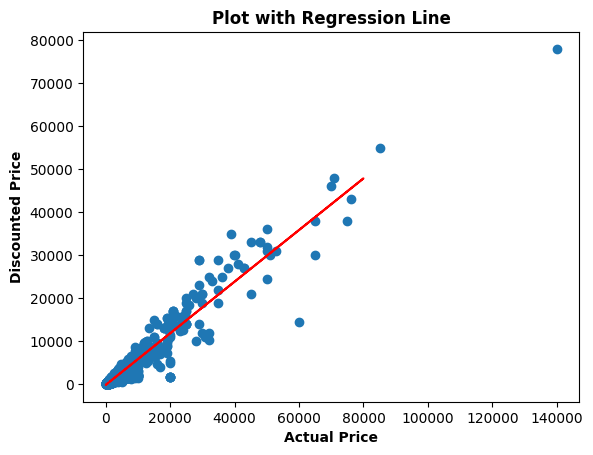

In [242]:
#Scatter Plot with Regression Line

plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, color='red')
plt.xlabel('Actual Price', fontweight='bold')
plt.ylabel('Discounted Price', fontweight='bold')
plt.title('Plot with Regression Line', fontweight='bold')
plt.show()

In [243]:
#Cross Validation Result

from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=10, shuffle=True, random_state=21)

cv_results = cross_val_score(reg, X, y, cv=kf)

print('Cross Validation Results Mean: ', cv_results.mean())

Cross Validation Results Mean:  0.9159405293663456
